## 导入工具包

In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

## 读取数据

In [2]:
train = pd.read_csv("input\\train\\dataset.csv")
test = pd.read_csv("input\\test\\testing_set_for_users.csv")
dbd_faultcode = pd.read_csv("input\\train\\dbd_faultcode.csv", encoding='gbk')

E:\Program Files\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 训练集EDA

### 1、数据集分析

In [3]:
train.head()

,Unnamed: 0,ACCEXCCOUNT,ACCRUNTIMES,ACCSTATE,ACCWORKTIMES,ALARM_0001,ALARM_0002,ALARM_0003,ALARM_0004,ALARM_0005,...,VEHICLENO,VEHICLESTATUS,VERSIONNUM,WATERTEMPERATURE,WIRELESSTEMP1,WIRELESSTEMP2,WIRELESSTEMP3,WIRELESSTEMP4,WORKDETAILID,WORKHOURS
0,535252,NaN,NaN,1.0,1095.83,0.0,0.0,0.0,0.0,0.0,...,XUG02631THJE00230,1.0,NaN,NaN,NaN,NaN,NaN,NaN,7285148.0,NaN
1,611637,NaN,NaN,1.0,1377.16,0.0,0.0,0.0,0.0,0.0,...,XUG02633TGJE00499,1.0,NaN,NaN,NaN,NaN,NaN,NaN,8396881.0,NaN
2,176787,NaN,NaN,0.0,261.22,0.0,0.0,0.0,0.0,0.0,...,XUG02233HHJE00797,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2172359.0,NaN
3,208670,NaN,NaN,1.0,1730.52,0.0,0.0,0.0,0.0,0.0,...,XUG02233VHJE01038,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2576101.0,NaN
4,450358,NaN,NaN,1.0,0.05,0.0,0.0,0.0,0.0,0.0,...,XUG02233CHJE00883,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5953890.0,NaN


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875088 entries, 0 to 1875087
Columns: 125 entries, Unnamed: 0 to WORKHOURS
dtypes: float64(118), int64(2), object(5)
memory usage: 1.7+ GB


- 训练集包含1875088条样本，125列。
- 有三种数据类型，分别是：浮点型（118），整型（2），字符串（5）

### 2、缺失值分析

对数据的缺失情况进行分析，分为严重缺失，较严重缺失，部分缺失和不确实情况
- 严重缺失（缺失率达到99%以上）的数据统计意义不大，往往直接删除
- 较严重缺失（缺失率达到95%以上），我们先分析不缺失数据，因为此类数据可能隐藏着某些重要信息，我们对其进行与标签的相关性分析，再决定是否将其删除
- 部分缺失和不缺失数据往往蕴含着重要信息，我们暂时将其保留

In [5]:
all_missing_columns = train.columns[train.isnull().sum()==train.shape[0]]
print("共有%d列数据完全缺失" % all_missing_columns.shape[0])
all_missing_columns

共有32列数据完全缺失


Index(['ACCEXCCOUNT', 'ENGINELOADSTATE', 'ENVHUMIDITY', 'ENVTEMPERATURE',
       'INSIDE_HUMIDITY', 'INSIDE_TEMPERATURE', 'ISANALYSED', 'MILENUMBER',
       'MIXSTATE', 'OC', 'OILLOCATION', 'OILPERCENT1', 'OILPRESSURE',
       'OILTEMPERATURE', 'OILVALUE1', 'OILVALUE2', 'OPTOILLEVEL',
       'POWERDOWNSTATE', 'PULSESIGNS', 'QUSHOILTIMES', 'ROAD', 'ROUNDSPEED',
       'TERMINALEL_INSIDE', 'TERMINALEL_OUTSIDE', 'TERMINALSTATUS',
       'VERSIONNUM', 'WATERTEMPERATURE', 'WIRELESSTEMP1', 'WIRELESSTEMP2',
       'WIRELESSTEMP3', 'WIRELESSTEMP4', 'WORKHOURS'],
      dtype='object')

- 在125列数据中，有32列数据完全缺失，这些数据对于模型的训练没有任何增益，所以我们选择将其删除
- 训练集中的第一列无任何意义（训练集中没有该列），所以我们选择将其删除

In [6]:
train.drop(all_missing_columns, axis=1, inplace=True)
train.drop("Unnamed: 0", axis=1, inplace=True)
test.drop(all_missing_columns, axis=1, inplace=True)

In [7]:
train.isnull().sum()

ACCRUNTIMES                   1633687
ACCSTATE                       241401
ACCWORKTIMES                   241401
ALARM_0001                     241401
ALARM_0002                     241401
ALARM_0003                     241401
ALARM_0004                     241401
ALARM_0005                     241401
ALARM_0006                     241401
ALARM_0007                     241401
ALARM_0008                     241401
ALARM_0009                     241401
ALARM_0010                     241401
ALTITUDE                       241401
AREA                             1036
CD_VP_UNIQUENO                 241401
CITY                             1036
CMDTYPE                        241401
COLLECTTIME                         0
COOLANTLEVEL                   604698
COOLANTTEMPERATURE             605322
CURRENTFAULTCOUNT1            1553673
CURRENTFAULTCOUNT2            1553673
CURRENTFAULTCOUNT3            1873600
CURRENTFAULTCOUNT4            1873600
CURRENTFAULTCOUNT5            1875081
CURRENTFAULT

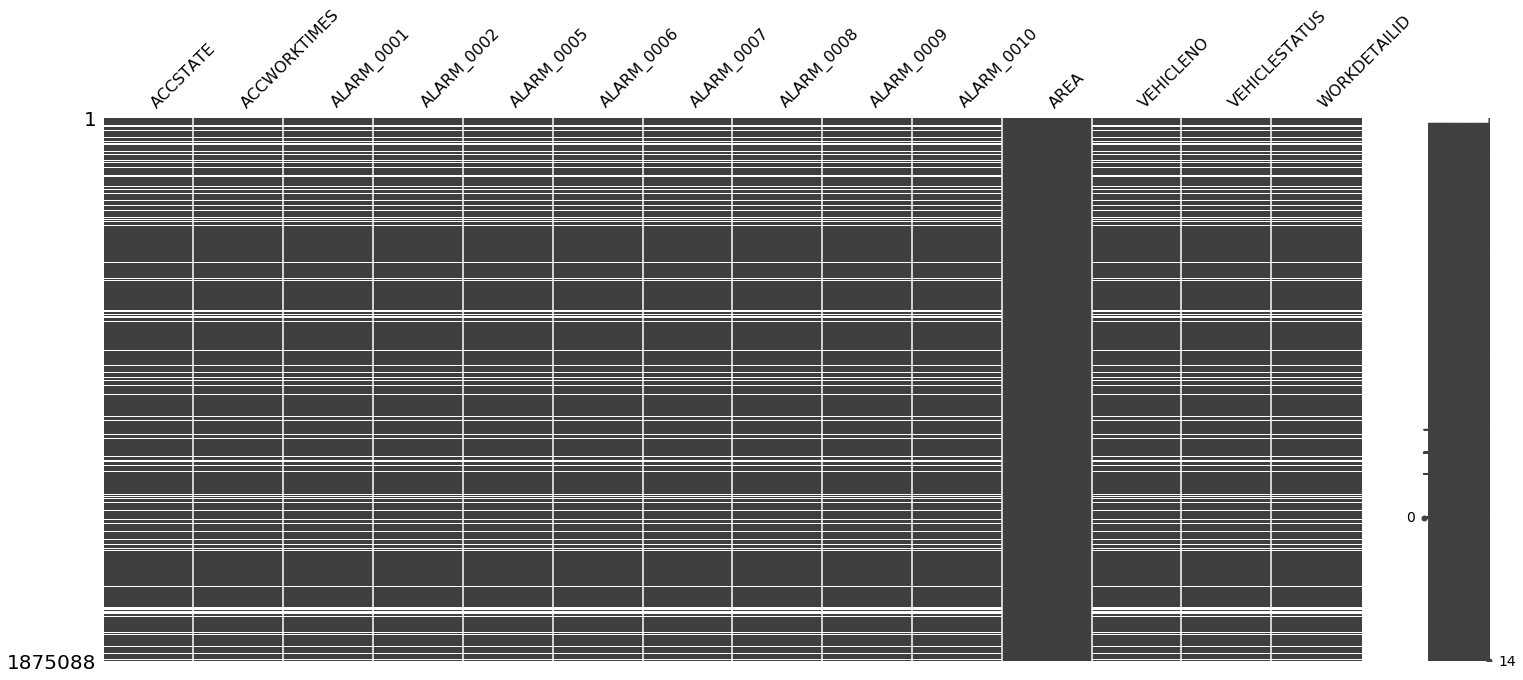

In [8]:
msno.matrix(train[['ACCSTATE','ACCWORKTIMES','ALARM_0001','ALARM_0002','ALARM_0005','ALARM_0006','ALARM_0007','ALARM_0008','ALARM_0009','ALARM_0010','AREA','VEHICLENO','VEHICLESTATUS','WORKDETAILID']])

通过可视化分析，发现很多样本是同事缺失了多个数据，而不是随机缺失

### 3、单值分析

有些特征的数据都是一个值，这种特征对模型无法带来增益，只能给模型带来噪音，所以我们选择将这种数据删除
- 共有8列特征仅仅只包含一个元素值，这些特征列的名称为：
> 'ALARM_0001', 'ALARM_0006', 'CMDTYPE', 'COOLANTLEVEL', 'LOCK_ALL', 'LOWVOLTAGESTATUS', 'SPNCONVERSIONMODE6', 'SPNMSB5'

In [ ]:
onlyone_val_columns = train.columns[train.nunique(axis=0) == 1]

In [9]:
train.drop(['ALARM_0001', 'ALARM_0006', 'CMDTYPE', 'COOLANTLEVEL', 'LOCK_ALL', 'LOWVOLTAGESTATUS', 'SPNCONVERSIONMODE6', 'SPNMSB5'], axis=1, inplace=True)

In [10]:
test.drop(['ALARM_0001', 'ALARM_0006', 'CMDTYPE', 'COOLANTLEVEL', 'LOCK_ALL', 'LOWVOLTAGESTATUS', 'SPNCONVERSIONMODE6', 'SPNMSB5'], axis=1, inplace=True)

### 4、label转换&分析
前面我们删除了部分对模型训练无用的特征，此处我们对剩余特征进行重点相关性分析。首先将类别标签进行拼接。

In [11]:
dbd_faultcode.head(10)

,CODE,SPN,FMI,DESCRIPTION,ENGINETYPEID,FAULTSOURCE,FAULTNAME
0,1175,1576,5,油泵电磁阀1开路或对地短路,1958,上柴国三,油泵电磁阀1开路或对地短路
1,1176,9781,12,供油泵过载,1958,上柴国三,供油泵过载
2,1177,4232,12,供油泵过压,1958,上柴国三,供油泵过压
3,1178,4710,12,供油泵无负荷,1958,上柴国三,供油泵无负荷
4,1179,147,12,供油泵由于油泵泄漏失去负荷,1958,上柴国三,供油泵由于油泵泄漏失去负荷
5,1180,4233,2,共轨压力超过上限,1958,上柴国三,共轨压力超过上限
6,1181,136,2,共轨压力超过最高限制,1958,上柴国三,共轨压力超过最高限制
7,1182,4641,2,实际共轨压力低于目标值的控制下限,1958,上柴国三,实际共轨压力低于目标值的控制下限
8,1183,1543,2,CPU出错,1958,上柴国三,CPU出错
9,1184,1542,2,主CPU出错,1958,上柴国三,主CPU出错


In [12]:
def spn_fmi_2_code(Spn_Fmi, Code):
    spn_fmi_dict = {}
    for i in range(len(Spn_Fmi)):
        spn_fmi_dict[Spn_Fmi[i]] = Code[i]
    return spn_fmi_dict

In [13]:
dbd_faultcode['SPN_FMI'] = dbd_faultcode['SPN'].fillna(-1).astype(int).astype(str) + '_' + dbd_faultcode['FMI'].fillna(-1).astype(int).astype(str)
train['SPN_FMI'] = train['SPN'].fillna(-1).astype(int).astype(str) + '_' + train['FMI'].fillna(-1).astype(int).astype(str)

spn_fmi_dict = spn_fmi_2_code(dbd_faultcode['SPN_FMI'].values, dbd_faultcode['CODE'].values)
spn_fmi_dict['-1_-1'] = -1

def transfer_2_code(x):
    if x in spn_fmi_dict.keys():
        return spn_fmi_dict[x]
    return -1

train['SPN_FMI_Code'] = train['SPN_FMI'].apply(transfer_2_code)

In [14]:
code_distribution = pd.DataFrame(train['SPN_FMI_Code'].value_counts().reset_index())
code_distribution.columns = ['Code','CodeNum']
code_distribution

,Code,CodeNum
0,-1,1649858
1,1206,215738
2,1239,8194
3,1141,1075
4,1182,144
5,1168,41
6,1211,24
7,1216,4
8,1209,4
9,1145,2


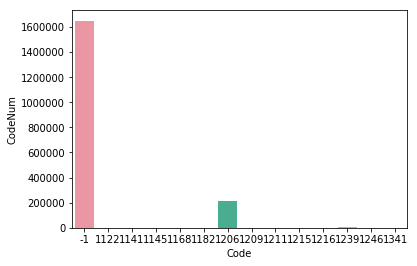

In [15]:
sns.barplot(x ='Code', y = 'CodeNum', data = code_distribution)

In [16]:
train_target  = train[train.SPN_FMI_Code.isin([1206,1239,1141,1174,1182])]

In [17]:
target_code = [1206,1239,1141,1174,1182]
dbd_faultcode[dbd_faultcode.CODE.isin(target_code)]

,CODE,SPN,FMI,DESCRIPTION,ENGINETYPEID,FAULTSOURCE,FAULTNAME,SPN_FMI
7,1182,4641,2,实际共轨压力低于目标值的控制下限,1958,上柴国三,实际共轨压力低于目标值的控制下限,4641_2
31,1206,8809,15,油水分离器中液位过高,1958,上柴国三,油水分离器中液位过高,8809_15
63,1239,108,4,大气压力传感器电压低于下限门槛值,1958,潍柴国三,大气压力传感器电压低于下限门槛值,108_4
220,1141,8480,2,油门踏板传感器#1和#2信号无效,1958,上柴国三,油门踏板传感器#1和#2信号无效,8480_2
251,1174,9779,5,油泵电磁阀#2开路或对地短路,1958,上柴国三,油泵电磁阀#2开路或对地短路,9779_5


In [18]:
all_missing_columns_2 = train_target.columns[train_target.isnull().sum() == train_target.shape[0]]
onlyone_val_columns_2 = train_target.columns[train_target.nunique(axis=0) == 1]

In [19]:
train_target.drop(all_missing_columns_2, axis=1, inplace=True)
train_target.drop(onlyone_val_columns_2, axis=1, inplace=True)

E:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
train_target['SPN_FMI_Code'].value_counts()

1206    215738
1239      8194
1141      1075
1182       144
Name: SPN_FMI_Code, dtype: int64

In [21]:
train_target.head()

,ACCRUNTIMES,AREA,CITY,COLLECTTIME,FAULTTIME,FMI,FRID,LAT,LNG,PROVINCE,READFLAG,SPN,UNIQUENO,SPN_FMI,SPN_FMI_Code
23150,979.0,341322.0,341300.0,2018-04-01 06:23:45,2018-04-01 06:23:45,15.0,2357817.0,34.108867,34.108867,340000.0,1.0,8809.0,201704140835245913,8809_15,1206
23178,979.0,341322.0,341300.0,2018-04-01 06:25:45,2018-04-01 06:25:45,15.0,2357818.0,34.108877,34.108877,340000.0,1.0,8809.0,201704140835245913,8809_15,1206
23208,979.0,341322.0,341300.0,2018-04-01 06:27:45,2018-04-01 06:27:45,15.0,2357819.0,34.108891,34.108891,340000.0,1.0,8809.0,201704140835245913,8809_15,1206
23240,979.0,341322.0,341300.0,2018-04-01 06:29:45,2018-04-01 06:29:45,15.0,2357821.0,34.109057,34.109057,340000.0,1.0,8809.0,201704140835245913,8809_15,1206
23274,979.0,341322.0,341300.0,2018-04-01 06:31:45,2018-04-01 06:31:45,15.0,2357822.0,34.109043,34.109043,340000.0,1.0,8809.0,201704140835245913,8809_15,1206


### 5、单变量分析
#### ACCRUNTIMES
- Code1239的ACCRUNTIMES的最小值为4021，比其他三个的最大值都大，可以根据该特征进行区分
- Code1182的最大值小于800

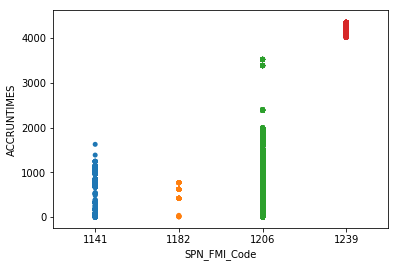

In [22]:
sns.stripplot(x='SPN_FMI_Code', y='ACCRUNTIMES', data=train_target)

In [23]:
test['ACCRUNTIMES'].describe()

count    71559.000000
mean      1054.037354
std        926.316787
min          0.000000
25%        488.000000
50%        897.000000
75%       1211.000000
max       4498.000000
Name: ACCRUNTIMES, dtype: float64

In [24]:
train_target[train_target.SPN_FMI_Code==1141]['ACCRUNTIMES'].describe()

count    1075.000000
mean      572.342326
std       413.494064
min         0.000000
25%       167.000000
50%       718.000000
75%       973.000000
max      1627.000000
Name: ACCRUNTIMES, dtype: float64

In [25]:
train_target[train_target.SPN_FMI_Code==1182]['ACCRUNTIMES'].describe()

count    144.000000
mean     550.500000
std      185.069256
min        6.000000
25%      419.000000
50%      620.000000
75%      621.000000
max      771.000000
Name: ACCRUNTIMES, dtype: float64

In [26]:
train_target[train_target.SPN_FMI_Code==1206]['ACCRUNTIMES'].describe()

count    215738.000000
mean        878.156690
std         379.871741
min           0.000000
25%         652.000000
50%         877.000000
75%        1139.000000
max        3527.000000
Name: ACCRUNTIMES, dtype: float64

In [27]:
train_target[train_target.SPN_FMI_Code==1239]['ACCRUNTIMES'].describe()

count    8194.000000
mean     4199.182695
std        93.519804
min      4021.000000
25%      4119.000000
50%      4191.000000
75%      4281.000000
max      4355.000000
Name: ACCRUNTIMES, dtype: float64

#### READFLAG
- READFLAG为0时，只有Code1206出现了
- READFLAG为1时，出现了其他所有标签

In [37]:
readflag = pd.DataFrame(train_target.groupby('READFLAG')['SPN_FMI_Code'].value_counts())
readflag.columns = ['showtimes']
readflag.reset_index(inplace=True)
readflag.head()

,READFLAG,SPN_FMI_Code,showtimes
0,0.0,1206,4581
1,1.0,1206,211157
2,1.0,1239,8194
3,1.0,1141,1075
4,1.0,1182,144


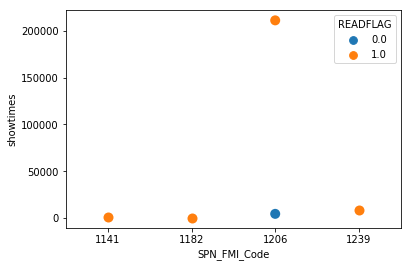

In [42]:
sns.stripplot(x='SPN_FMI_Code', y='showtimes', hue='READFLAG', data=readflag, size=10)

#### PROVINCE
- 训练集中的Province在测试集中都有

In [56]:
train_target.head()

,ACCRUNTIMES,AREA,CITY,COLLECTTIME,FAULTTIME,FMI,FRID,LAT,LNG,PROVINCE,READFLAG,SPN,UNIQUENO,SPN_FMI,SPN_FMI_Code
23150,979.0,341322.0,341300.0,2018-04-01 06:23:45,2018-04-01 06:23:45,15.0,2357817.0,34.108867,34.108867,340000.0,1.0,8809.0,201704140835245913,8809_15,1206
23178,979.0,341322.0,341300.0,2018-04-01 06:25:45,2018-04-01 06:25:45,15.0,2357818.0,34.108877,34.108877,340000.0,1.0,8809.0,201704140835245913,8809_15,1206
23208,979.0,341322.0,341300.0,2018-04-01 06:27:45,2018-04-01 06:27:45,15.0,2357819.0,34.108891,34.108891,340000.0,1.0,8809.0,201704140835245913,8809_15,1206
23240,979.0,341322.0,341300.0,2018-04-01 06:29:45,2018-04-01 06:29:45,15.0,2357821.0,34.109057,34.109057,340000.0,1.0,8809.0,201704140835245913,8809_15,1206
23274,979.0,341322.0,341300.0,2018-04-01 06:31:45,2018-04-01 06:31:45,15.0,2357822.0,34.109043,34.109043,340000.0,1.0,8809.0,201704140835245913,8809_15,1206


In [61]:
set(train_target['PROVINCE'].value_counts().index) - set(test['PROVINCE'].unique())

set()

In [69]:
province_code_distribution = pd.DataFrame({'PROVINCE': train_target['PROVINCE'].unique()})
codes = [1206,1141,1182,1239 ]
for code in codes:
    province_code_distribution[code] = 0
    province = train_target[train_target.SPN_FMI_Code==code]["PROVINCE"].unique()
    province_code_distribution.loc[province_code_distribution.PROVINCE.isin(province), code] = 1 
    
province_code_distribution.set_index('PROVINCE',inplace= True)

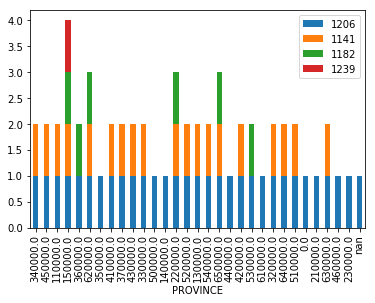

In [70]:
province_code_distribution.plot(kind='bar', stacked=True)